In [1]:
import stephpreprocessing
import pandas as pd
import numpy as np 
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pydot
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from stephpreprocessing import convert2matrix
from stephpreprocessing import model_loss
from stephpreprocessing import prediction_plot
from stephpreprocessing import model_rnn
from tensorflow.keras import layers
from keras.layers import Activation, SimpleRNN
from stephpreprocessing import model_dnn
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
df=pd.read_csv(r'Data/COVID_AU_national_daily_change.csv')

In [3]:
df

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent
0,2020-01-25,4,0,0,0,0,0,0,0
1,2020-01-26,0,0,0,0,0,0,0,0
2,2020-01-27,1,0,0,0,0,0,0,0
3,2020-01-28,0,0,0,0,0,0,0,0
4,2020-01-29,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
237,2020-09-18,48,0,45422,48,63,-9,-1,0
238,2020-09-19,24,0,39050,24,107,-2,-3,-2
239,2020-09-20,13,0,33039,13,100,3,-2,-1
240,2020-09-21,14,0,23436,14,95,-2,-2,-2


In [4]:
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 9 columns):
date         242 non-null datetime64[ns]
confirmed    242 non-null int64
deaths       242 non-null int64
tests        242 non-null int64
positives    242 non-null int64
recovered    242 non-null int64
hosp         242 non-null int64
icu          242 non-null int64
vent         242 non-null int64
dtypes: datetime64[ns](1), int64(8)
memory usage: 17.1 KB


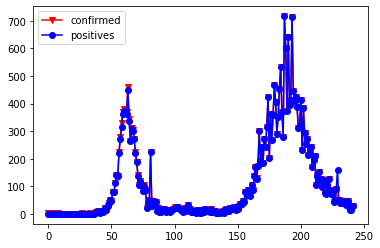

In [5]:
plt.plot(df['confirmed'],data=df,color='red',marker='v')
plt.plot(df['positives'],data=df,color='blue',marker='o')
plt.legend()

**Just to check why they got 2 columns of the same target. Looks like I will need to drop positive and keep confirm as target**

In [6]:
df.set_index('date',inplace=True)

In [7]:
look_back=6
y = df['confirmed']
X = df.drop(['confirmed','positives'], axis=1)

**I suggested not to stadardize dataset at this point-they are on the same scale (number of people) and furthermore the data is too small, standardize does not really help, to leave it in the way it should be, we can see the weight based on the variance of each coeeficient upon the model.**

In [45]:
rs = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=rs)

## I will try DNN first

In [9]:
model1=model_dnn(6)
history=model1.fit(X_train,y_train, epochs=100,  verbose=1, validation_data=(X_test,y_test),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

Train on 171 samples, validate on 71 samples
Epoch 1/100
171/171 [==============================] - 0s 626us/step - loss: 13845141.0789 - mse: 13845140.0000 - mae: 2787.3542 - val_loss: 4432404.5000 - val_mse: 4432404.5000 - val_mae: 1661.6904
Epoch 2/100
171/171 [==============================] - 0s 47us/step - loss: 1525536.4887 - mse: 1525536.5000 - mae: 853.5865 - val_loss: 37060.4733 - val_mse: 37060.4727 - val_mae: 113.2604
Epoch 3/100
171/171 [==============================] - 0s 52us/step - loss: 642734.0300 - mse: 642734.0625 - mae: 537.1744 - val_loss: 1472859.0423 - val_mse: 1472859.0000 - val_mae: 956.6992
Epoch 4/100
171/171 [==============================] - 0s 41us/step - loss: 1479948.1023 - mse: 1479948.1250 - mae: 921.5721 - val_loss: 977032.4912 - val_mse: 977032.4375 - val_mae: 777.1895
Epoch 5/100
171/171 [==============================] - 0s 58us/step - loss: 491450.2693 - mse: 491450.2812 - mae: 524.0004 - val_loss: 53944.1653 - val_mse: 53944.1602 - val_mae: 153

Epoch 45/100
171/171 [==============================] - 0s 52us/step - loss: 14870.8080 - mse: 14870.8086 - mae: 84.8972 - val_loss: 16492.4609 - val_mse: 16492.4609 - val_mae: 93.2531
Epoch 46/100
171/171 [==============================] - 0s 35us/step - loss: 14859.3517 - mse: 14859.3506 - mae: 84.8549 - val_loss: 16468.2176 - val_mse: 16468.2168 - val_mae: 93.1730
Epoch 47/100
171/171 [==============================] - 0s 41us/step - loss: 14847.7443 - mse: 14847.7441 - mae: 84.8113 - val_loss: 16443.8066 - val_mse: 16443.8066 - val_mae: 93.0896
Epoch 48/100
171/171 [==============================] - 0s 58us/step - loss: 14835.7708 - mse: 14835.7705 - mae: 84.7656 - val_loss: 16419.4387 - val_mse: 16419.4375 - val_mae: 93.0055
Epoch 49/100
171/171 [==============================] - 0s 41us/step - loss: 14823.9359 - mse: 14823.9355 - mae: 84.7215 - val_loss: 16395.5232 - val_mse: 16395.5234 - val_mae: 92.9236
Epoch 50/100
171/171 [==============================] - 0s 41us/step - loss

171/171 [==============================] - 0s 47us/step - loss: 14289.8333 - mse: 14289.8330 - mae: 82.6452 - val_loss: 15631.3232 - val_mse: 15631.3242 - val_mae: 91.2093
Epoch 90/100
171/171 [==============================] - 0s 47us/step - loss: 14275.5478 - mse: 14275.5469 - mae: 82.5875 - val_loss: 15619.5007 - val_mse: 15619.5000 - val_mae: 91.2056
Epoch 91/100
171/171 [==============================] - 0s 47us/step - loss: 14261.3374 - mse: 14261.3379 - mae: 82.5299 - val_loss: 15608.3007 - val_mse: 15608.3008 - val_mae: 91.2024
Epoch 92/100
171/171 [==============================] - 0s 35us/step - loss: 14247.0815 - mse: 14247.0820 - mae: 82.4736 - val_loss: 15597.5102 - val_mse: 15597.5107 - val_mae: 91.1992
Epoch 93/100
171/171 [==============================] - 0s 35us/step - loss: 14232.8293 - mse: 14232.8301 - mae: 82.4189 - val_loss: 15587.2359 - val_mse: 15587.2363 - val_mae: 91.1964
Epoch 94/100
171/171 [==============================] - 0s 47us/step - loss: 14218.5882 

In [10]:
train_score = model1.evaluate(X_train, y_train, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model1.evaluate(X_test,y_test, verbose=0)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))


Train Root Mean Squared Error(RMSE): 118.03; Train Mean Absolute Error(MAE) : 81.42 
Test Root Mean Squared Error(RMSE): 124.61; Test Mean Absolute Error(MAE) : 91.17 


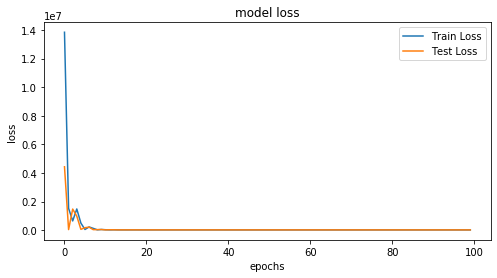

In [11]:
model_loss(history)

**Dataset is too small to state if this is overfitted at this note. You can see that I do even do GridSearch on this because QUT computer is too weak to run that**

In [12]:
y_pred=model1.predict(X_test)

In [48]:
y_test.shape

(71,)

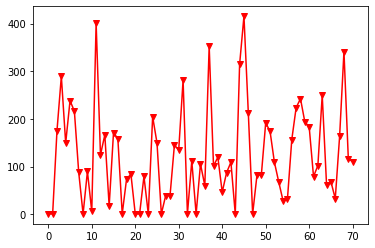

In [51]:
plt.plot(y_pred,color='red',marker='v')


well this one I dont know what it lost my timeseries attribute when pre-processing, last time it was not like this. Still, I will visit back when I have time because it is not very accurate model anyway

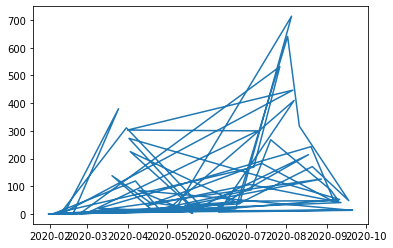

In [50]:
plt.plot(y_test)

In [73]:
import VisualizeNN as VisNN
network=VisNN.DrawNN([21,16,1], model3.coef_)
network.draw()

AttributeError: 'GridSearchCV' object has no attribute 'coef_'

# MPLREGSSOR 

In [57]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [58]:
X, y = make_regression(n_samples=200, random_state=1)

Max_iter is not converged if the value is below 1800

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model2 = MLPRegressor(random_state=1, max_iter=2000).fit(X_train, y_train)

In [63]:
model2.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [64]:
print("Train accuracy:", model2.score(X_train, y_train))
print("Test accuracy:", model2.score(X_test, y_test))

Train accuracy: 0.9999988891208844
Test accuracy: 0.5209157440819883


Super over-fitted, let's try again

In [65]:
params = {'hidden_layer_sizes': [(x,) for x in range(1,20, 1)],'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.05]}


In [69]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve
model3 = GridSearchCV(param_grid=params, estimator=MLPRegressor(random_state=42), cv=10, n_jobs=-1)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
print(model3.best_params_)

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (16,), 'solver': 'lbfgs'}


Better but still not applicable

In [70]:
print("Train accuracy:", model3.score(X_train, y_train))
print("Test accuracy:", model3.score(X_test, y_test))

Train accuracy: 0.9999998437114332
Test accuracy: 0.8535560705648819


In [74]:
model4=MLPRegressor(activation='relu',random_state=1, max_iter=2000,hidden_layer_sizes=16,solver='lbfgs')

In [75]:
model4.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=16, learning_rate='constant',
             learning_rate_init=0.001, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [79]:
import VisualizeNN as VisNN
network=VisNN.DrawNN([5,5,1], model4.coefs_)
network.draw()

ValueError: Image size of 360000x240000 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001AE23863828> (for post_execute):


ValueError: Image size of 86400x57600 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 86400x57600 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 86400x57600 with 1 Axes>